In [1]:
from AllPowerConst import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m = Basemap(
  projection="merc",
  resolution='l',
  area_thresh=0.1,
  llcrnrlon=-75,
  llcrnrlat=35,
  urcrnrlon=10,
  urcrnrlat=55
)

In [3]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# construct route 1
iso_set1, iso_trimmed1 = isochrone(p_dep, p_des, 1, 20, 20, 1, 1, 20, 0, 0)
iso_path1 = construct_isopath(iso_set1)
ind1 = int(np.argwhere(iso_path1[:,-1,3] == min(iso_path1[:,-1,3])).ravel())
# lowest fuel consumption
tran_fuelc = iso_path1[ind1][-1, 3]
tran_timec = iso_path1[ind1][-1, 0]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
iso_set2, iso_trimmed2 = isochrone(p_dep, p_des, 1, 20, 20, 6, 2, 20, tran_timec, tran_fuelc)
iso_path2 = construct_isopath(iso_set2)
ind2 = int(np.argwhere(iso_path2[:,-1,3] == min(iso_path2[:,-1,3])).ravel())

In [4]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# construct route 1
isop_set1, isop_trimmed1 = isopone(p_dep, p_des, 1, 20, 20, 6000, 1, 20, 0, 0)
isop_path1 = construct_isop_path(isop_set1)
ind3 = int(np.argwhere(isop_path1[:,-1,3] == min(isop_path1[:,-1,3])).ravel())
# lowest fuel consumption
tran_fuelc = isop_path1[ind3][-1, 3]
tran_timec = isop_path1[ind3][-1, 0]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
isop_set2, isop_trimmed2 = isopone(p_dep, p_des, 1, 20, 20, 20000, 1, 20, tran_timec, tran_fuelc)
isop_path2 = construct_isop_path(isop_set2)
ind4 = int(np.argwhere(isop_path2[:,-1,3] == min(isop_path2[:,-1,3])).ravel())

In [5]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# # construct route 1
dy2_set1 = TwoDDP(p_dep, p_des, 20, 1, 31, 0.08, 3, 0, 0)
dy2_path1 = construct_dypath2(dy2_set1)
dy2timec = dy2_path1[-1,0]
dy2fuelc = dy2_path1[-1,3]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
dy2_set2 = TwoDDP(p_dep, p_des, 20, 6, 31, 0.1, 3, dy2timec, dy2fuelc)
dy2_path2 = construct_dypath2(dy2_set2)

In [6]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# # construct route 1
DijkGraph1 = gen_graph(p_dep, p_des, 20, 1, 25, 0.07)
GraphWidth = len(DijkGraph1)
GraphHeight = max([len(dijkgraph) for dijkgraph in DijkGraph1])
DijkGrid1 = DijkstraGrid(GraphWidth, GraphHeight)
Dcf1, Dcsf1 = dijkstra(DijkGrid1, DijkGraph1, (0, 0), (GraphWidth - 1, 0), 20, 5, 0, 0)
Dij_path1 = construct_dijpath((GraphWidth - 1, 0),(0, 0), Dcf1, Dcsf1, DijkGraph1)
dij_timec = Dij_path1[-1,0]
dij_fuelc = Dij_path1[-1,3]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
DijkGraph2 = gen_graph(p_dep, p_des, 20, 6, 25, 0.1)
GraphWidth = len(DijkGraph2)
GraphHeight = max([len(dijkgraph) for dijkgraph in DijkGraph2])
DijkGrid2 = DijkstraGrid(GraphWidth, GraphHeight)
Dcf2, Dcsf2 = dijkstra(DijkGrid2, DijkGraph2, (0, 0), (GraphWidth - 1, 0), 20, 5, dij_timec, dij_fuelc)
Dij_path2 = construct_dijpath((GraphWidth - 1, 0),(0, 0), Dcf2, Dcsf2, DijkGraph2)

In [7]:
# departure
p_dep = np.array([3.9, 52.0])
# destination
p_des = np.array([-5.0, 49.0])
# # construct route 1
dy3_set1 = ThreeDDP(p_dep, p_des, 20, 1, 31, 0.08, 3, 0, 0)
dy3_path1 = construct_dypath3(dy3_set1)
dy3timec = dy3_path1[-1,0]
dy3fuelc = dy3_path1[-1,3]
# departure
p_dep = np.array([-5.0, 49.0])
# destination
p_des = np.array([-73.0, 40.0])
# construct route 2
dy3_set2 = ThreeDDP(p_dep, p_des, 20, 6, 31, 0.1, 3, dy3timec, dy3fuelc)
dy3_path2 = construct_dypath3(dy3_set2)

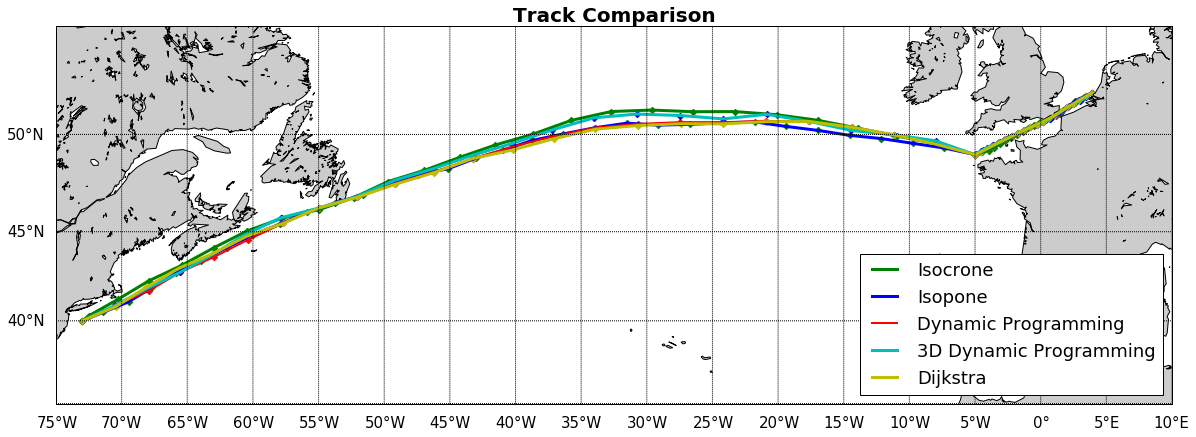

In [16]:
plt.figure(figsize=(20, 15))
plt.title('Track Comparison', fontsize=20, fontweight='bold')
# Isochrone
x, y = m(iso_path1[ind1][:, 1], iso_path1[ind1][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='g', label = "Isocrone")
m.scatter(x, y, marker='D',color='g')
x, y = m(iso_path2[ind2][:, 1], iso_path2[ind2][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='g')
m.scatter(x, y, marker='D',color='g')
# Isopone
x, y = m(isop_path1[ind3][:, 1], isop_path1[ind3][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='b', label = "Isopone")
m.scatter(x, y, marker='D',color='g')
x, y = m(isop_path2[ind4][:, 1], isop_path2[ind4][:, 2])
m.plot(x, y, marker=None, linewidth=3, color='b')
m.scatter(x, y, marker='D',color='g')
# 2D
x, y = m(dy2_path1[:,2], dy2_path1[:,3])
m.plot(x, y, marker=None, linewidth=2, color='r', label = "Dynamic Programming")
m.scatter(x, y, marker='D',color='r')
x, y = m(dy2_path2[:,2], dy2_path2[:,3])
m.plot(x, y, marker=None, linewidth=2, color='r')
m.scatter(x, y, marker='D',color='r')
# 3D
x, y = m(dy3_path1[:,1], dy3_path1[:,2])
m.plot(x, y, marker=None, linewidth=3, color='c', label = "3D Dynamic Programming")
m.scatter(x, y, marker='D',color='b')
x, y = m(dy3_path2[:,1], dy3_path2[:,2])
m.plot(x, y, marker=None, linewidth=3, color='c')
m.scatter(x, y, marker='D',color='b')
# Dij
x, y = m(Dij_path1[:,1], Dij_path1[:,2])
m.plot(x, y, marker=None, linewidth=3, color='y', label = "Dijkstra")
m.scatter(x, y, marker='D',color='y')
x, y = m(Dij_path2[:,1], Dij_path2[:,2])
m.plot(x, y, marker=None, linewidth=3, color='y')
m.scatter(x, y, marker='D',color='y')
    
m.drawparallels(np.arange(-90.,120.,5.), labels=[1,0,0,0], fontsize=15)
m.drawmeridians(np.arange(-180.,180.,5.), labels=[0,0,0,1], fontsize=15)
m.drawcoastlines()
m.fillcontinents()
plt.legend(loc = 4,prop={'size':18})
plt.show()

In [9]:
iso_int = np.vstack((iso_path1[ind1][1:], iso_path2[ind2][1:]))
isop_int = np.vstack((isop_path1[ind3][1:], isop_path2[ind4][1:]))
dy2_int = np.vstack((dy2_path1[1:], dy2_path2[1:]))
dy3_int = np.vstack((dy3_path1[1:], dy3_path2[1:]))
dij_int = np.vstack((Dij_path1[1:], Dij_path2[1:]))

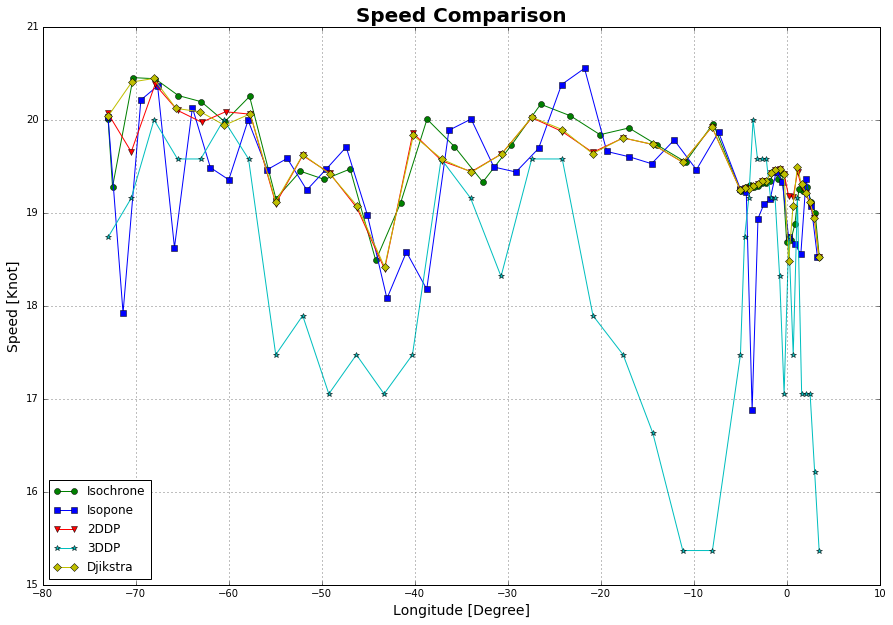

In [10]:
plt.figure(figsize=(15, 10))
plt.title("Speed Comparison", fontsize = 20, fontweight='bold')
plt.ylabel("Speed [Knot]", fontsize = 14)
plt.xlabel("Longitude [Degree]", fontsize = 14)
plt.plot(iso_int[:,1],iso_int[:,8], marker = "o", color = "g", label = "Isochrone")
plt.plot(isop_int[:,1],isop_int[:,8], marker = "s", color = "b", label = "Isopone")
plt.plot(dy2_int[:,2],dy2_int[:,1], marker = "v", color = "r", label = "2DDP")
plt.plot(dy3_int[:,1],dy3_int[:,4], marker ="*", color = "c", label = "3DDP")
plt.plot(dij_int[:,1],dij_int[:,8], marker = "D", color = "y", label = "Djikstra")

plt.grid()
plt.legend(loc = 3)
plt.show()

In [11]:
hs = {}
hs[1] = [weather_info.hs([i[2],i[1],i[0]]) for i in iso_int]
hs[2] = [weather_info.hs([i[2],i[1],i[0]]) for i in isop_int]
hs[3] = [weather_info.hs([i[3],i[2],i[0]]) for i in dy2_int]
hs[4] = [weather_info.hs([i[2],i[1],i[0]]) for i in dy3_int]
hs[5] = [weather_info.hs([i[2],i[1],i[0]]) for i in dij_int]

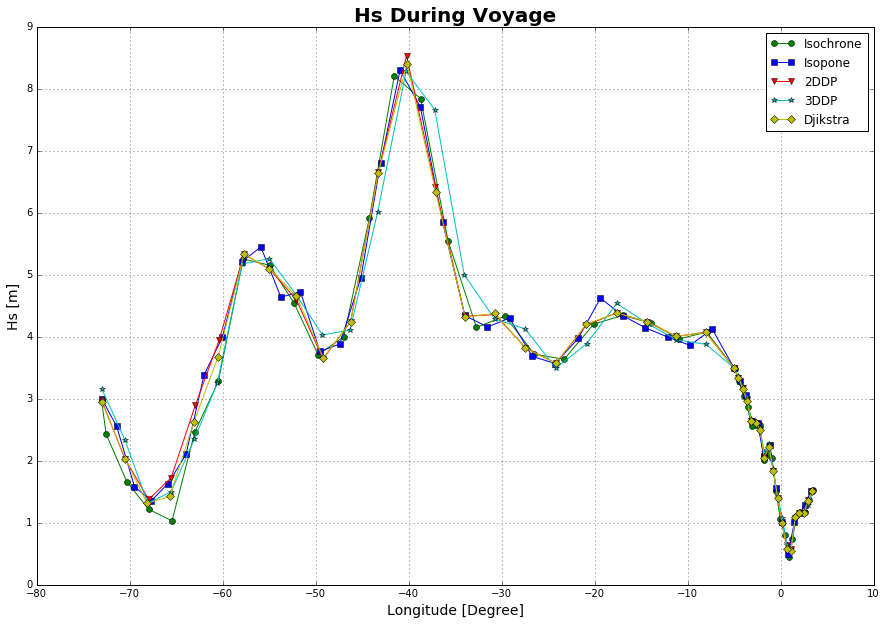

In [12]:
plt.figure(figsize=(15, 10))
plt.title("Hs During Voyage", fontsize = 20, fontweight='bold')
plt.ylabel("Hs [m]", fontsize = 14)
plt.xlabel("Longitude [Degree]", fontsize = 14)
plt.plot(iso_int[:,1], hs[1], marker = "o", color = "g", label = "Isochrone")
plt.plot(isop_int[:,1],hs[2], marker = "s", color = "b", label = "Isopone")
plt.plot(dy2_int[:,2],hs[3], marker = "v", color = "r", label = "2DDP")
plt.plot(dy3_int[:,1],hs[4], marker = "*", color = "c", label = "3DDP")
plt.plot(dij_int[:,1],hs[5], marker = "D", color = "y", label = "Djikstra")

plt.grid()
plt.legend(loc = 1)
plt.show()

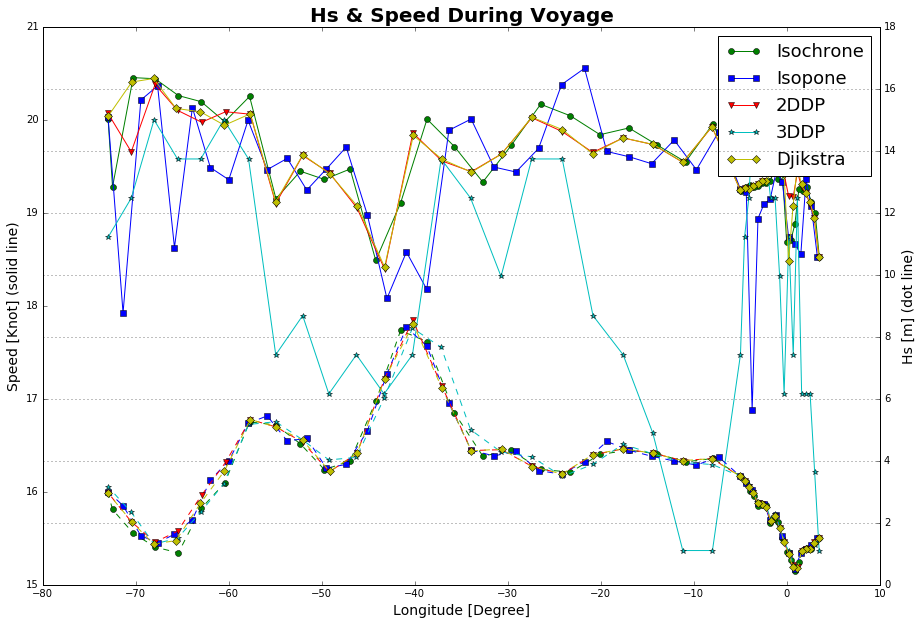

In [17]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()


ax1.set_title("Hs & Speed During Voyage", fontsize = 20, fontweight='bold')
ax1.set_xlabel("Longitude [Degree]", fontsize = 14)
ax1.set_ylabel("Speed [Knot] (solid line)", fontsize = 14)
ax1.set_ylim([15,21])
ax1.plot(iso_int[:,1],iso_int[:,8], marker = "o", color = "g", label = "Isochrone")
ax1.plot(isop_int[:,1],isop_int[:,8], marker = "s", color = "b", label = "Isopone")
ax1.plot(dy2_int[:,2],dy2_int[:,1], marker = "v", color = "r", label = "2DDP")
ax1.plot(dy3_int[:,1],dy3_int[:,4], marker ="*", color = "c", label = "3DDP")
ax1.plot(dij_int[:,1],dij_int[:,8], marker = "D", color = "y", label = "Djikstra")
ax1.legend(loc = 1,prop={'size':18})

ax2.set_ylabel("Hs [m] (dot line)", fontsize = 14)
ax2.set_ylim([0,18])
ax2.plot(iso_int[:,1], hs[1], marker = "o", color = "g", label = "Isochrone",linestyle = "--")
ax2.plot(isop_int[:,1],hs[2], marker = "s", color = "b", label = "Isopone",linestyle = "--")
ax2.plot(dy2_int[:,2],hs[3], marker = "v", color = "r", label = "2DDP",linestyle = "--")
ax2.plot(dy3_int[:,1],hs[4], marker = "*", color = "c", label = "3DDP",linestyle = "--")
ax2.plot(dij_int[:,1],hs[5], marker = "D", color = "y", label = "Djikstra",linestyle = "--")



plt.grid()

plt.show()

In [14]:
print max(iso_int[:,0]), max(isop_int[:,0]), max(dy2_int[:,0]), max(dy3_int[:,0]), max(dij_int[:,0])

165.592150016 166.007619142 165.740767211 167.482886938 165.549318216


In [15]:
dy3_set2[2][0].time


array([ 32.48352708,  32.15449694,  31.84255929,  31.54641594,
        31.26489696,  30.99694515,  30.49800041,  30.2653464 ,
        30.04291895,  29.62616013])